# Importing the important libraries and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sb
import matplotlib.pyplot as plt
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
plt.style.use("seaborn")
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=pd.read_csv(r"/content/tough_dataset.csv",engine="python")
df.drop("id",1,inplace=True)
df.head()

,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer�s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Linux,Django,React,IPython / Jupyter;Sublime Text;Vim,Linux-based,NaN,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,10+ years,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_busin

# Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split as tts
train,test=tts(df,test_size=0.2,shuffle=True,random_state=20)

In [ ]:
train.shape,test.shape

((2356, 68), (590, 68))

# Dropping duplicate rows

In [ ]:
train=train.drop_duplicates()
test=test.drop_duplicates()
train.shape,test.shape

((2356, 68), (590, 68))

# Creating a text cleaning function

In [ ]:
def clean_text(x,data):
  ps = PorterStemmer()
  for i in range(len(data)):
    x=re.sub('[^a-zA-Z]', ' ',x)
    x=x.split()
    x=[ps.stem(word) for word in x if not word in stopwords.words('english')]
    x=' '.join(x)

    return x

# Creating a function to fill null values, clean text and encode the values of every categorical variable

In [ ]:
def cat_clean(variable):
  train[variable].fillna(train[variable].mode()[0],inplace=True)
  test[variable].fillna(test[variable].mode()[0],inplace=True)

  train[variable]=train[variable].apply(lambda x:clean_text(x,train))
  test[variable]=test[variable].apply(lambda x:clean_text(x,test))

  train[variable]=le.fit_transform(train[variable])
  test[variable]=le.fit_transform(test[variable])

# Univariate Analysis of each independent variable
## 'LOAN_AMT'

In [ ]:
train["LOAN_AMT"].isnull().sum(),test["LOAN_AMT"].isnull().sum()

(0, 0)

In [ ]:
train["LOAN_AMT"].describe()

count     2356.000000
mean     15325.435059
std       8672.104017
min       1000.000000
25%       8581.250000
50%      14400.000000
75%      20000.000000
max      35000.000000
Name: LOAN_AMT, dtype: float64

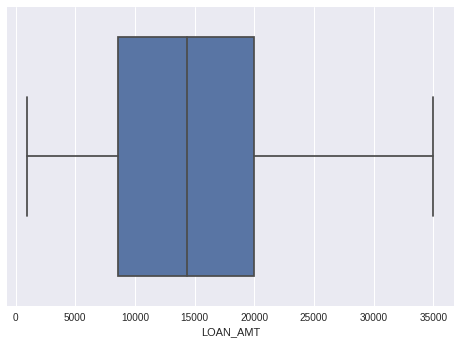

In [ ]:
sb.boxplot(x="LOAN_AMT",data=train)

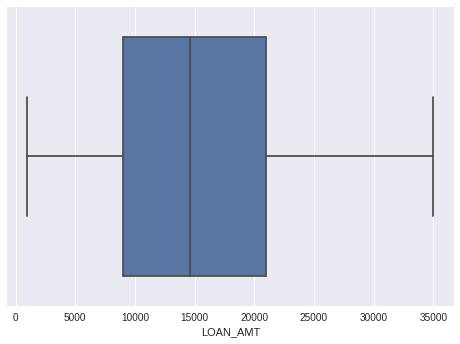

In [ ]:
sb.boxplot(x="LOAN_AMT",data=test)

#### Hence, there are no outliers 
## 'Business Title'

In [ ]:
cat_clean("Business Title")

In [ ]:
train["Business Title"].value_counts()

102    28
849    25
265    23
292    22
326    19
       ..
91      1
85      1
77      1
73      1
0       1
Name: Business Title, Length: 1094, dtype: int64

## 'Civil Service Title'

In [ ]:
cat_clean("Civil Service Title")

In [ ]:
train["Civil Service Title"].value_counts()

123    144
46      92
141     61
113     61
110     57
      ... 
9        1
11       1
31       1
55       1
0        1
Name: Civil Service Title, Length: 300, dtype: int64

## 'Division/Work Unit'

In [ ]:
cat_clean("Division/Work Unit")

In [ ]:
train["Division/Work Unit"].value_counts()

258    37
144    31
243    31
362    28
58     24
       ..
329     1
470     1
252     1
337     1
0       1
Name: Division/Work Unit, Length: 631, dtype: int64

## 'Job Description'

In [ ]:
cat_clean("Job Description")

In [ ]:
train["Job Description"].value_counts()

1011    15
1016     6
552      5
1438     4
210      4
        ..
1170     1
749      1
1162     1
1160     1
1456     1
Name: Job Description, Length: 1457, dtype: int64

## 'Minimum Qual Requirements'

In [ ]:
cat_clean("Minimum Qual Requirements")

In [ ]:
train["Minimum Qual Requirements"].value_counts()

53     165
180     92
109     61
218     61
216     57
      ... 
274      1
121      1
80       1
292      1
61       1
Name: Minimum Qual Requirements, Length: 298, dtype: int64

## 'Preferred Skills'

In [ ]:
cat_clean("Preferred Skills")

In [ ]:
train["Preferred Skills"].value_counts()

366     355
575      17
114      12
610      10
68        7
       ... 
603       1
858       1
601       1
868       1
1149      1
Name: Preferred Skills, Length: 1150, dtype: int64

## 'Addition Information'

In [ ]:
cat_clean("Additional Information")

In [ ]:
train["Additional Information"].value_counts()

78     998
230     53
305     47
231     41
423     36
      ... 
486      1
484      1
476      1
472      1
503      1
Name: Additional Information, Length: 504, dtype: int64

## 'To Apply'

In [ ]:
train["To Apply"].value_counts()

Click the "Apply Now" button.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   232
Click, "APPLY NOW" Current city employees must apply via Employee Self-Service (ESS)                                                                                                

In [ ]:
cat_clean("To Apply")

In [ ]:
train["To Apply"].value_counts()

174    546
179    112
223     94
44      73
113     66
      ... 
200      1
21       1
196      1
193      1
23       1
Name: To Apply, Length: 374, dtype: int64

## 'Hours/Shift'

In [ ]:
train["Hours/Shift"].value_counts()

35 Hours                                                                                                                                                                                                                                                   105
35 hours per week                                                                                                                                                                                                                                           35
Day - Due to the necessary technical support duties of this position in a 24/7 operation, candidate may be required to work various shifts such as weekends and/or nights/evenings.                                                                         29
35 hours per week / day                                                                                                                                                                                                                    

In [ ]:
cat_clean("Hours/Shift")

In [ ]:
train["Hours/Shift"].value_counts()

27     1767
36       84
38       39
20       29
83       28
       ... 
90        1
76        1
74        1
70        1
106       1
Name: Hours/Shift, Length: 108, dtype: int64

## 'Residency Requirement'

In [ ]:
cat_clean("Residency Requirement")

In [ ]:
train["Residency Requirement"].value_counts()

7     1372
12     696
21     185
23      22
14      15
28      13
2        8
15       8
13       4
20       3
6        2
10       2
18       2
0        2
1        2
3        2
5        2
9        2
11       2
17       2
19       2
25       1
26       1
24       1
22       1
16       1
8        1
4        1
27       1
Name: Residency Requirement, dtype: int64

In [ ]:
train.drop("Posting Date",1,inplace=True)
test.drop("Posting Date",1,inplace=True)

train.drop("Posting Updated",1,inplace=True)
test.drop("Posting Updated",1,inplace=True)

train.drop("Process Date",1,inplace=True)
test.drop("Process Date",1,inplace=True)

## 'Formal Education'

In [ ]:
cat_clean("FormalEducation")

In [ ]:
train["FormalEducation"].value_counts()

2    1190
3     589
8     254
7     143
1      68
4      60
6      33
5      12
0       7
Name: FormalEducation, dtype: int64

## 'UndergradMajor'

In [ ]:
cat_clean("UndergradMajor")

In [ ]:
train["UndergradMajor"].value_counts()

7     1623
9      193
6      164
3       91
10      64
0       56
11      49
2       37
4       33
8       27
5       17
1        2
Name: UndergradMajor, dtype: int64

## 'CompanySize'

In [ ]:
train["CompanySize"].fillna(train["CompanySize"].mode()[0],inplace=True)
test["CompanySize"].fillna(test["CompanySize"].mode()[0],inplace=True)

train["CompanySize"]=le.fit_transform(train["CompanySize"])
test["CompanySize"]=le.fit_transform(test["CompanySize"])

In [ ]:
train["CompanySize"].value_counts()

4    580
3    466
2    307
1    261
0    251
7    237
6    171
5     83
Name: CompanySize, dtype: int64

## 'DevType'

In [ ]:
cat_clean("DevType")

In [ ]:
train["DevType"].value_counts()

671    219
16     164
436    149
686    119
458    103
      ... 
1        1
3        1
5        1
7        1
619      1
Name: DevType, Length: 694, dtype: int64

## 'YearsCoding'

In [ ]:
train["YearsCoding"].isnull().sum(),test["YearsCoding"].isnull().sum()

(3, 0)

In [ ]:
train["YearsCoding"].fillna(train["YearsCoding"].mode()[0],inplace=True)

In [ ]:
train["YearsCoding"]=le.fit_transform(train["YearsCoding"])
test["YearsCoding"]=le.fit_transform(test["YearsCoding"])

In [ ]:
train["YearsCoding"].value_counts()

7     563
9     496
10    357
1     234
0     188
2     168
3     145
8      68
4      64
5      45
6      28
Name: YearsCoding, dtype: int64

## 'YearsCodingProf'

In [ ]:
train["YearsCodingProf"].isnull().sum(),test["YearsCodingProf"].isnull().sum()

(334, 74)

In [ ]:
train["YearsCodingProf"].fillna(train["YearsCodingProf"].mode()[0],inplace=True)
test["YearsCodingProf"].fillna(test["YearsCodingProf"].mode()[0],inplace=True)

In [ ]:
train["YearsCodingProf"]=le.fit_transform(train["YearsCodingProf"])
test["YearsCodingProf"]=le.fit_transform(test["YearsCodingProf"])

In [ ]:
train["YearsCodingProf"].value_counts()

7     962
0     509
9     324
10    210
1     114
2      80
3      69
4      33
8      27
5      18
6      10
Name: YearsCodingProf, dtype: int64

## 'HopeFiveYears'

In [ ]:
cat_clean("HopeFiveYears")

In [ ]:
train["HopeFiveYears"].value_counts()

3    1075
5     487
0     388
4     194
6     138
2      47
1      27
Name: HopeFiveYears, dtype: int64

## 'JobSearchStatus'

In [ ]:
cat_clean("JobSearchStatus")

In [ ]:
train["JobSearchStatus"].value_counts()

0    1562
2     531
1     263
Name: JobSearchStatus, dtype: int64

## 'LastNewJob'

In [ ]:
cat_clean("LastNewJob")

In [ ]:
train["LastNewJob"].value_counts()

2    1069
1     895
3     390
0       2
Name: LastNewJob, dtype: int64

## 'UpdateCV'

In [ ]:
cat_clean("UpdateCV")

In [ ]:
train["UpdateCV"]

2101    6
298     7
947     0
752     7
253     7
       ..
1814    7
1428    7
2441    7
271     1
2522    2
Name: UpdateCV, Length: 2356, dtype: int64

## 'CommunicationTools'

In [ ]:
cat_clean("CommunicationTools")

In [ ]:
train["CommunicationTools"].value_counts()

272    849
293     88
90      66
290     40
276     38
      ... 
282      1
280      1
199      1
270      1
228      1
Name: CommunicationTools, Length: 310, dtype: int64

## 'TimeFullyProductive'

In [ ]:
cat_clean("TimeFullyProductive")

In [ ]:
train["TimeFullyProductive"].value_counts()

3    1443
0     528
5     265
4      84
2      21
1      15
Name: TimeFullyProductive, dtype: int64

## 'EducationTypes'

In [ ]:
cat_clean("EducationTypes")

In [ ]:
train["EducationTypes"].value_counts()

238    793
198    107
239     97
67      60
154     56
      ... 
39       1
31       1
144      1
25       1
167      1
Name: EducationTypes, Length: 246, dtype: int64

## 'SelfTaughtTypes'

In [ ]:
cat_clean("SelfTaughtTypes")

In [ ]:
train["SelfTaughtTypes"].value_counts()

117    1001
175      90
180      85
193      74
199      65
       ... 
190       1
196       1
201       1
3         1
160       1
Name: SelfTaughtTypes, Length: 204, dtype: int64

## 'TimeAfterBootcamp'

In [ ]:
cat_clean("TimeAfterBootcamp")

In [ ]:
train["TimeAfterBootcamp"].value_counts()

0    2271
3      29
6      20
4      14
2       9
7       6
5       4
1       3
Name: TimeAfterBootcamp, dtype: int64

## 'HackathonReasons' 

In [ ]:
cat_clean("HackathonReasons")

In [ ]:
train["HackathonReasons"].value_counts()

70    1767
94      83
73      50
67      24
20      23
      ... 
62       1
79       1
86       1
84       1
40       1
Name: HackathonReasons, Length: 95, dtype: int64

## 'AgreeDisagree1'

In [ ]:
cat_clean("AgreeDisagree1")

In [ ]:
train["AgreeDisagree1"].value_counts()

0    1585
2     330
3     307
1     104
4      30
Name: AgreeDisagree1, dtype: int64

## 'AgreeDisagree2'

In [ ]:
cat_clean("AgreeDisagree2")

In [ ]:
train["AgreeDisagree2"].value_counts()

0    1114
1     457
2     442
4     213
3     130
Name: AgreeDisagree2, dtype: int64

## 'AgreeDisagree3'

In [ ]:
cat_clean("AgreeDisagree3")

In [ ]:
train["AgreeDisagree3"].value_counts()

1    1248
4     407
2     406
0     240
3      55
Name: AgreeDisagree3, dtype: int64

## 'LanguageWorkedWith'

In [ ]:
cat_clean("LanguageWorkedWith")

In [ ]:
train["LanguageWorkedWith"].value_counts()

584     430
1159     34
592      28
928      27
1133     23
       ... 
245       1
243       1
241       1
239       1
1284      1
Name: LanguageWorkedWith, Length: 1286, dtype: int64

## 'LanguageDesireNextYear'

In [ ]:
cat_clean("LanguageDesireNextYear")

In [ ]:
train["LanguageDesireNextYear"].value_counts()

1247    540
0        27
496      20
948      19
520      15
       ... 
191       1
189       1
187       1
185       1
1306      1
Name: LanguageDesireNextYear, Length: 1307, dtype: int64

## 'DatabaseWorkedWith'

In [ ]:
cat_clean("DatabaseWorkedWith")

In [ ]:
train["DatabaseWorkedWith"].value_counts()

474    802
272    129
490     76
344     60
579     39
      ... 
1        1
3        1
5        1
7        1
584      1
Name: DatabaseWorkedWith, Length: 586, dtype: int64

## 'DatabaseDesireNextYear'

In [ ]:
cat_clean("DatabaseDesireNextYear")

In [ ]:
train["DatabaseDesireNextYear"].value_counts()

616    963
479     63
176     57
416     49
681     26
      ... 
483      1
45       1
47       1
49       1
688      1
Name: DatabaseDesireNextYear, Length: 689, dtype: int64

## 'PlatformWorkedWith'

In [ ]:
cat_clean("PlatformWorkedWith")

In [ ]:
train["PlatformWorkedWith"].value_counts()

656    828
606    118
632     69
358     48
47      40
      ... 
93       1
95       1
97       1
99       1
576      1
Name: PlatformWorkedWith, Length: 662, dtype: int64

## 'PlatformDesireNextYear'

In [ ]:
cat_clean("PlatformDesireNextYear")

In [ ]:
train["PlatformDesireNextYear"].value_counts()

739    909
782     49
760     40
600     36
491     35
      ... 
137      1
135      1
715      1
131      1
726      1
Name: PlatformDesireNextYear, Length: 787, dtype: int64

## 'FrameworkWorkedWith'

In [ ]:
cat_clean("FrameworkWorkedWith")

In [ ]:
train["FrameworkWorkedWith"].value_counts()

131    1162
190      86
163      86
167      75
62       73
       ... 
29        1
31        1
33        1
35        1
197       1
Name: FrameworkWorkedWith, Length: 198, dtype: int64

## 'FrameworkDesireNextYear'

In [ ]:
cat_clean("FrameworkDesireNextYear")

In [ ]:
train["FrameworkDesireNextYear"].value_counts()

285    1051
233      83
282      64
325      63
307      57
       ... 
29        1
27        1
25        1
23        1
330       1
Name: FrameworkDesireNextYear, Length: 331, dtype: int64

## 'IDE'

In [ ]:
cat_clean("IDE")

In [ ]:
train["IDE"].value_counts()

722    530
652     62
650     61
712     54
719     52
      ... 
45       1
47       1
49       1
51       1
698      1
Name: IDE, Length: 726, dtype: int64

## 'OperatingSystem'

In [ ]:
cat_clean("OperatingSystem")

In [ ]:
train["OperatingSystem"].value_counts()

3    1376
2     547
1     429
0       4
Name: OperatingSystem, dtype: int64

## 'Methodology'

In [ ]:
cat_clean("Methodology")

In [ ]:
train["Methodology"].value_counts()

102    1048
0       227
88      168
86       77
100      68
       ... 
53        1
61        1
9         1
68        1
127       1
Name: Methodology, Length: 140, dtype: int64

## 'VersionControl'

In [ ]:
cat_clean("VersionControl")

In [ ]:
train["VersionControl"].value_counts()

5     1583
18     181
25     132
31      63
39      52
0       45
9       41
7       35
28      33
21      26
8       25
44      15
1       14
24      14
30       9
19       9
3        9
20       8
12       8
41       7
27       5
26       4
32       4
34       3
15       3
2        3
33       2
11       2
13       2
22       2
42       2
6        1
16       1
10       1
4        1
14       1
23       1
37       1
35       1
36       1
38       1
40       1
43       1
29       1
17       1
45       1
Name: VersionControl, dtype: int64

## 'CheckIncode'

In [ ]:
cat_clean("CheckInCode")

In [ ]:
train["CheckInCode"].value_counts()

2    1694
0     312
4     171
5     121
1      36
3      22
Name: CheckInCode, dtype: int64

## 'AIDangerous'

In [ ]:
cat_clean("AIDangerous")

In [ ]:
train["AIDangerous"].value_counts()

0    1230
1     433
2     392
3     301
Name: AIDangerous, dtype: int64

## 'AIInteresting'


In [ ]:
cat_clean("AIInteresting")

In [ ]:
train["AIInteresting"].value_counts()

3    1377
0     389
1     385
2     205
Name: AIInteresting, dtype: int64

## 'AIResponsible'

In [ ]:
cat_clean("AIResponsible")

In [ ]:
train["AIResponsible"].value_counts()

3    1483
0     482
2     256
1     135
Name: AIResponsible, dtype: int64

## 'AIFuture'

In [ ]:
cat_clean("AIFuture")

In [ ]:
train["AIFuture"].value_counts()

1    1879
2     322
0     155
Name: AIFuture, dtype: int64

## 'Age'

In [ ]:
train["Age"].fillna(train["Age"].mode()[0],inplace=True)
test["Age"].fillna(test["Age"].mode()[0],inplace=True)

train["Age"]=le.fit_transform(train["Age"])
test["Age"]=le.fit_transform(test["Age"])

In [ ]:
train["Age"].value_counts()

1    1637
0     331
2     288
3      76
4      16
5       8
Name: Age, dtype: int64

## 'term'

In [ ]:
train["term"].fillna(train["term"].mode()[0],inplace=True)
test["term"].fillna(test["term"].mode()[0],inplace=True)

train["term"]=le.fit_transform(train["term"])
test["term"]=le.fit_transform(test["term"])

In [ ]:
train["term"].value_counts()

0    1665
1     691
Name: term, dtype: int64

## 'emp_length'

In [ ]:
train["emp_length"].fillna(train["emp_length"].mode()[0],inplace=True)
test["emp_length"].fillna(test["emp_length"].mode()[0],inplace=True)

train["emp_length"]=le.fit_transform(train["emp_length"])
test["emp_length"]=le.fit_transform(test["emp_length"])

In [ ]:
train["emp_length"].value_counts()

1     914
10    222
3     215
2     212
5     148
0     138
4     134
8     118
6      98
9      81
7      76
Name: emp_length, dtype: int64

## 'loan_status'

In [ ]:
cat_clean("loan_status")

In [ ]:
train["loan_status"].value_counts()

3    1751
1     354
2     238
4      12
0       1
Name: loan_status, dtype: int64

## 'pymnt_plan'

In [ ]:
train["pymnt_plan"].fillna(train["pymnt_plan"].mode()[0],inplace=True)
test["pymnt_plan"].fillna(test["pymnt_plan"].mode()[0],inplace=True)

train["pymnt_plan"]=le.fit_transform(train["pymnt_plan"])
test["pymnt_plan"]=le.fit_transform(test["pymnt_plan"])

In [ ]:
train["pymnt_plan"].value_counts()

0    2356
Name: pymnt_plan, dtype: int64

## 'url'

In [ ]:
train["url"].fillna(train["url"].mode()[0],inplace=True)
test["url"].fillna(test["url"].mode()[0],inplace=True)

In [ ]:
train["url"]=le.fit_transform(train["url"])
test["url"]=le.fit_transform(test["url"])

In [ ]:
train["url"].value_counts()

2047    1
1236    1
1268    1
1266    1
1264    1
       ..
477     1
475     1
473     1
471     1
0       1
Name: url, Length: 2356, dtype: int64

## 'purpose'

In [ ]:
cat_clean("purpose")

In [ ]:
train["purpose"].value_counts()

3     1373
2      595
0      118
4      117
6       43
1       28
10      27
7       18
11      13
5       12
8       11
9        1
Name: purpose, dtype: int64

## 'title'

In [ ]:
cat_clean("title")

In [ ]:
train["title"].value_counts()

3     1400
2      578
6      113
10     112
7       43
1       28
0       27
8       18
11      13
5       12
9       11
4        1
Name: title, dtype: int64

## 'zip_code'

In [ ]:
train["zip_code"].fillna(train["zip_code"].mode()[0],inplace=True)
test["zip_code"].fillna(test["zip_code"].mode()[0],inplace=True)

In [ ]:
train["zip_code"]=le.fit_transform(train["zip_code"])
test["zip_code"]=le.fit_transform(test["zip_code"])

In [ ]:
train["zip_code"].value_counts()

69     29
203    29
377    27
441    27
455    25
       ..
171     1
173     1
175     1
396     1
580     1
Name: zip_code, Length: 582, dtype: int64

## 'addr_state'

In [ ]:
cat_clean("addr_state")

In [ ]:
train["addr_state"].value_counts()

4     269
41    199
32    198
9     155
33     91
43     87
10     82
18     82
12     81
36     81
29     74
25     68
17     68
20     66
5      60
22     52
3      50
45     45
21     45
6      41
40     37
1      37
13     36
38     32
16     31
46     29
31     28
35     28
2      24
15     24
14     21
11     13
37     13
19     12
34     12
8      12
47     10
30      9
23      9
28      8
27      6
44      6
24      5
26      4
39      4
7       4
48      3
42      3
0       2
Name: addr_state, dtype: int64

## 'dti'

In [ ]:
train["dti"].describe()

count    2356.000000
mean       19.314321
std         8.598822
min         0.000000
25%        12.997500
50%        18.785000
75%        25.430000
max        51.200000
Name: dti, dtype: float64

In [ ]:
train["dti"].isnull().sum(),test["dti"].isnull().sum()

(0, 0)

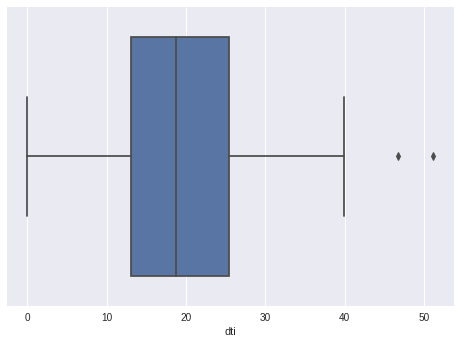

In [ ]:
sb.boxplot(x="dti",data=train)

In [ ]:
train["dti"]=train["dti"].apply(lambda x:train["dti"].median() if x>40 else x)

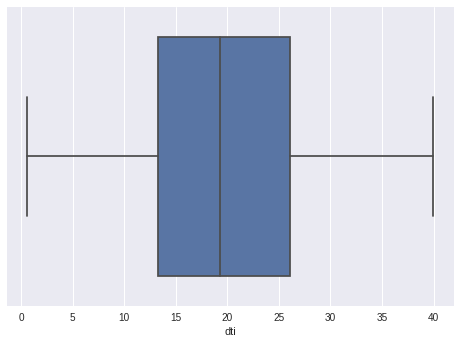

In [ ]:
sb.boxplot(x="dti",data=test)

## 'earliest_cr_line'

In [ ]:
train["earliest_cr_line"].fillna(train["earliest_cr_line"].mode()[0],inplace=True)
test["earliest_cr_line"].fillna(test["earliest_cr_line"].mode()[0],inplace=True)

In [ ]:
train["earliest_cr_line"]=le.fit_transform(train["earliest_cr_line"])
test["earliest_cr_line"]=le.fit_transform(test["earliest_cr_line"])

In [ ]:
train["earliest_cr_line"].value_counts()

80     23
63     22
69     21
81     21
59     20
       ..
238     1
261     1
259     1
257     1
212     1
Name: earliest_cr_line, Length: 409, dtype: int64

## 'last_pymnt_d'

In [ ]:
train["last_pymnt_d"].fillna(train["last_pymnt_d"].mode()[0],inplace=True)
test["last_pymnt_d"].fillna(test["last_pymnt_d"].mode()[0],inplace=True)

In [ ]:
train["last_pymnt_d"]=le.fit_transform(train["last_pymnt_d"])
test["last_pymnt_d"]=le.fit_transform(test["last_pymnt_d"])

In [ ]:
train["last_pymnt_d"].value_counts()

37    360
36    220
38     96
26     84
31     64
23     60
2      59
15     58
12     56
16     55
13     54
18     54
10     53
14     52
21     51
20     50
35     50
33     49
24     48
29     48
28     47
25     47
11     47
17     46
27     46
19     45
5      44
30     43
1      43
22     42
8      40
32     39
0      38
7      37
9      35
34     35
6      34
3      18
4       9
Name: last_pymnt_d, dtype: int64

## 'last_pymnt_amt'

In [ ]:
train["last_pymnt_amnt"].describe()

count     2356.000000
mean      4758.851375
std       6945.639788
min          0.030000
25%        366.752500
50%        888.200000
75%       7050.337500
max      35467.750000
Name: last_pymnt_amnt, dtype: float64

In [ ]:
train["last_pymnt_amnt"].isnull().sum(),test["last_pymnt_amnt"].isnull().sum()

(0, 0)

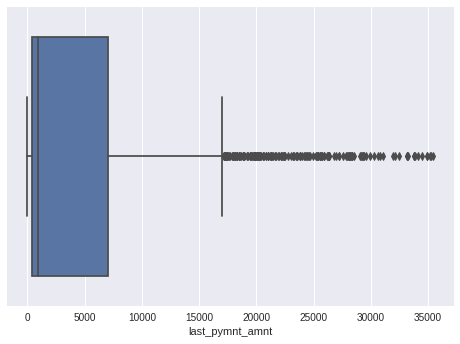

In [ ]:
sb.boxplot(x="last_pymnt_amnt",data=train)

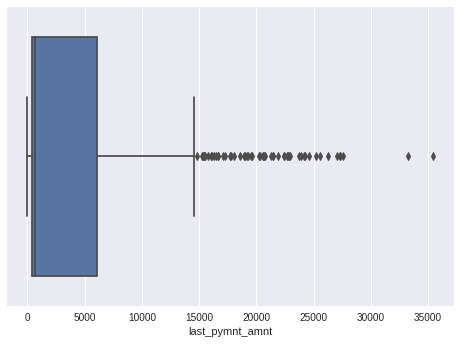

In [ ]:
sb.boxplot(x="last_pymnt_amnt",data=test)

In [ ]:
test["last_pymnt_amnt"]=test["last_pymnt_amnt"].apply(lambda x:test["last_pymnt_amnt"].median() if x>25000 else x)

In [ ]:
train.drop("next_pymnt_d",1,inplace=True)
test.drop("next_pymnt_d",1,inplace=True)

## 'last_credit_pull_d'

In [ ]:
train["last_credit_pull_d"].fillna(train["last_credit_pull_d"].mode()[0],inplace=True)
test["last_credit_pull_d"].fillna(test["last_credit_pull_d"].mode()[0],inplace=True)

In [ ]:
train["last_credit_pull_d"]=le.fit_transform(train["last_credit_pull_d"])
test["last_credit_pull_d"]=le.fit_transform(test["last_credit_pull_d"])

In [ ]:
train["last_credit_pull_d"].value_counts()

39    1013
27     190
38     130
37     128
30      77
34      63
35      54
36      48
32      47
26      45
23      43
29      38
33      37
16      33
24      32
22      31
25      29
28      29
14      28
18      27
19      26
13      25
15      24
17      23
11      21
21      20
3       18
20      14
7        9
31       8
1        7
6        7
4        7
5        6
2        5
10       4
9        3
12       3
8        2
0        2
Name: last_credit_pull_d, dtype: int64

# Splitting data w.r.t both targets

In [ ]:
trainA=train.drop("Target B",1)
testA=test.drop("Target B",1)

In [ ]:
trainB=train.drop("Target A",1)
testB=test.drop("Target A",1)

# Correlation filter

In [ ]:
corr_trainA=trainA.corr().abs()["Target A"]
corr_trainA=pd.DataFrame(corr_trainA)
corr_trainA=corr_trainA.T
corr_trainA

,Target A,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
Target A,1.0,0.008149,0.056313,0.241179,0.020719,0.029301,0.107031,0.075785,0.007292,0.044701,0.015468,0.179229,0.032303,0.029582,0.004545,0.032449,0.039458,0.014834,0.004942,0.017511,0.018888,0.009392,0.016697,0.038769,0.004485,0.020374,0.010616,0.002192,0.021431,0.017653,0.00341,0.014313,0.006221,0.02854,0.027865,0.000348,0.012116,0.017552,0.029908,0.02434,0.016357,0.010529,0.054841,0.015689,0.010981,0.011512,0.012711,0.02167,0.017051,0.019071,0.007264,0.00818,NaN,0.003706,0.008809,0.01024,0.0184,0.041297,0.007256,0.007137,0.00855,0.017485,0.009465


In [ ]:
drop_A=[column for column in corr_trainA.columns if any(corr_trainA[column]<0.05)]
drop_A

['LOAN_AMT',
 'Division/Work Unit',
 'Job Description',
 'Additional Information',
 'To Apply',
 'Hours/Shift',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'UpdateCV',
 'CommunicationTools',
 'TimeFullyProductive',
 'EducationTypes',
 'SelfTaughtTypes',
 'TimeAfterBootcamp',
 'HackathonReasons',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'Methodology',
 'CheckInCode',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'Age',
 'term',
 'emp_length',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [ ]:
trainA=trainA.drop(drop_A,1)
testA=testA.drop(drop_A,1)

In [ ]:
corr_trainB=trainB.corr().abs()["Target B"]
corr_trainB=pd.DataFrame(corr_trainB)
corr_trainB=corr_trainB.T
corr_trainB

,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,emp_length,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
Target B,1.0,0.050552,0.01152,0.023464,0.007408,0.004561,0.027178,0.003353,0.011315,0.016987,0.001444,0.00655,0.00278,0.036292,0.002842,0.002014,0.021619,0.004756,0.004971,0.006632,0.022537,0.012938,0.039933,0.025354,0.008406,0.000049,0.015591,0.003823,0.01321,0.026063,0.011538,0.002391,0.005328,0.006962,0.002186,0.021241,0.006451,0.016626,0.003577,0.000018,0.029196,0.012357,0.016912,0.002749,0.024622,0.009433,0.003272,0.002055,0.005118,0.037387,0.032815,0.014505,NaN,0.075226,0.090384,0.018355,0.036884,0.022444,0.004431,0.055499,0.033325,0.051835,0.016546


In [ ]:
drop_B=[column for column in corr_trainA.columns if any(corr_trainA[column]<0.05)]
drop_B

['LOAN_AMT',
 'Division/Work Unit',
 'Job Description',
 'Additional Information',
 'To Apply',
 'Hours/Shift',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'UpdateCV',
 'CommunicationTools',
 'TimeFullyProductive',
 'EducationTypes',
 'SelfTaughtTypes',
 'TimeAfterBootcamp',
 'HackathonReasons',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'Methodology',
 'CheckInCode',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'Age',
 'term',
 'emp_length',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [ ]:
trainB=trainB.drop(drop_B,1)
testB=testB.drop(drop_B,1)

In [ ]:
trainA.shape,testA.shape

((2356, 8), (590, 8))

In [ ]:
trainB.shape,testB.shape

((2356, 8), (590, 8))

# 'Evaluation Metric'

In [ ]:
from sklearn.metrics import mean_squared_error as mse
def rmse(true,pred):
    return np.sqrt(mse(true,pred))

In [ ]:
from sklearn.metrics import f1_score

# KFold cross validation

In [ ]:
from sklearn.model_selection import KFold

def kfoldpredA(model):
    kfold=KFold(5,random_state=20,shuffle=True)
    scores=[]
    for i,j in kfold.split(x_trainA,y_trainA):
        x_train,x_test=x_trainA.iloc[i],x_trainA.iloc[j]
        y_train,y_test=y_trainA.iloc[i],y_trainA.iloc[j]
        model.fit(x_train,y_train)
        foldpredA=model.predict(x_train)
        scores.append(rmse(foldpredA,y_train))
    return np.mean(scores)

def kfoldpredB(model):
    kfold=KFold(5,random_state=20,shuffle=True)
    scores=[]
    for i,j in kfold.split(x_trainB,y_trainB):
        x_train,x_test=x_trainB.iloc[i],x_trainB.iloc[j]
        y_train,y_test=y_trainB.iloc[i],y_trainB.iloc[j]
        model.fit(x_train,y_train)
        foldpredB=model.predict(x_train)
        scores.append(f1_score(foldpredB,y_train,average='weighted'))
    return np.mean(scores)

# Splitting into x and y

In [ ]:
y_trainA=trainA["Target A"]
x_trainA=trainA.drop("Target A",1)

y_testA=testA["Target A"]
x_testA=testA.drop("Target A",1)

y_trainB=trainB["Target B"]
x_trainB=trainB.drop("Target B",1)

y_testB=testB["Target B"]
x_testB=testB.drop("Target B",1)

# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

scaled_x_trainA=ss.fit_transform(x_trainA)
x_trainA=pd.DataFrame(scaled_x_trainA,columns=x_trainA.columns)

scaled_x_trainB=ss.fit_transform(x_trainB)
x_trainB=pd.DataFrame(scaled_x_trainB,columns=x_trainB.columns)

scaled_x_testA=ss.fit_transform(x_testA)
x_testA=pd.DataFrame(scaled_x_testA,columns=x_testA.columns)

scaled_x_testB=ss.fit_transform(x_testB)
x_testB=pd.DataFrame(scaled_x_testB,columns=x_testB.columns)

# Model Building for 'Target A'

## Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()

train_lrr=kfoldpredA(lrr)

tlrr=lrr.predict(x_testA)
tlrr=pd.DataFrame(tlrr,columns=["pred"])
print("Training error=",train_lrr)
print("Test error=",rmse(tlrr,y_testA))

Training error= 26114.99325364563
Test error= 23340.78161162777


## Knn Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)

train_knr=kfoldpredA(knr)

tknr=knr.predict(x_testA)
tknr=pd.DataFrame(tknr,columns=["pred"])
print("Training error=",train_knr)
print("Test error=",rmse(tknr,y_testA))

Training error= 19044.79585381942
Test error= 21534.845774357593


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=7,max_leaf_nodes=10)

train_dtr=kfoldpredA(dtr)

tdtr=dtr.predict(x_testA)
tdtr=pd.DataFrame(tdtr,columns=["pred"])
print("Training error=",train_dtr)
print("Test error=",rmse(tdtr,y_testA))

Training error= 21902.99149581075
Test error= 28323.45792103646


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=7)

train_rfr=kfoldpredA(rfr)

trfr=rfr.predict(x_testA)
trfr=pd.DataFrame(trfr,columns=["pred"])
print("Training error=",train_rfr)
print("Test error=",rmse(trfr,y_testA))

Training error= 15897.97835805874
Test error= 23692.627337232818


## XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
xgr=XGBRegressor(max_depth=10)

train_xgr=kfoldpredA(xgr)

txgr=xgr.predict(x_testA)
txgr=pd.DataFrame(txgr,columns=["pred"])

[02:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("Training error=",train_xgr)
print("Test error=",rmse(txgr,y_testA))

Training error= 3341.412072048844
Test error= 21563.853450176823


## Ensembling the models

In [ ]:
predictionsA=[]

for i in range(0,len(x_testA)):
  predictionsA.append(np.mean([trfr["pred"][i],tknr["pred"][i]]))

print("Final Test error=",rmse(predictionsA,y_testA))

Final Test error= 20911.35547306985


# Model Building for 'Target B'

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=7)

train_rfc=kfoldpredB(rfc)

trfc=rfc.predict(x_testB)
trfc=pd.DataFrame(trfc,columns=["pred"])
print("Training score=",100*train_rfc,"%")
print("Test score=",100*f1_score(trfc,y_testB,average='weighted'),"%")

Training score= 88.12906328481509 %
Test score= 87.68383063736547 %


#### Thus, the test rmse error for 'Target A' is 20911.3 and the test f1_score for 'Target B' is 87.7%.
